In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
!ls

EDA1.ipynb
competitive-data-science-predict-future-sales.zip
item_categories.csv
items.csv
sales_train.csv
sample_submission.csv
shops.csv
test.csv


In [117]:
sales = pd.read_csv('sales_train.csv')

In [118]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [68]:
sales['item_price'].value_counts().reset_index()

,index,item_price
0,299.000000,291352
1,399.000000,242603
2,149.000000,218432
3,199.000000,184044
4,349.000000,101461
...,...,...
19988,1170.600000,1
19989,237.600000,1
19990,1170.162500,1
19991,4613.545455,1


In [110]:
grouped = sales[['item_id','item_price']].groupby('item_id')
price = grouped.count()
price.columns = ['count']
price['mean'] = grouped.mean()
price['std/mean'] = grouped.std() / grouped.mean()
price

,count,mean,std/mean
item_id,,,
0,1,58.000000,NaN
1,6,4490.000000,0.000000
2,2,58.000000,0.000000
3,2,79.000000,0.375930
4,1,58.000000,NaN
...,...,...,...
22165,2,59.000000,0.000000
22166,270,150.000000,0.000000
22167,1114,297.686490,0.042586


In [119]:
sales_ = sales.merge(price.reset_index(), on='item_id').rename(columns={'mean':'mean_item_price'})
sales_['d_item_price'] = sales_['item_price'] - sales_['mean_item_price']
sales_['d_item_price / mean'] = (sales_['item_price'] - sales_['mean_item_price'])/sales_['mean_item_price']
sales = sales_
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,count,mean_item_price,std/mean,d_item_price,d_item_price / mean
0,02.01.2013,0,59,22154,999.0,1.0,59,702.932203,0.478661,296.067797,0.42119
1,23.01.2013,0,24,22154,999.0,1.0,59,702.932203,0.478661,296.067797,0.42119
2,20.01.2013,0,27,22154,999.0,1.0,59,702.932203,0.478661,296.067797,0.42119
3,02.01.2013,0,25,22154,999.0,1.0,59,702.932203,0.478661,296.067797,0.42119
4,03.01.2013,0,25,22154,999.0,1.0,59,702.932203,0.478661,296.067797,0.42119
...,...,...,...,...,...,...,...,...,...,...,...
2935844,17.10.2015,33,25,8428,249.0,1.0,1,249.000000,NaN,0.000000,0.00000
2935845,01.10.2015,33,25,7903,12198.0,1.0,1,12198.000000,NaN,0.000000,0.00000
2935846,29.10.2015,33,25,7610,2890.0,1.0,1,2890.000000,NaN,0.000000,0.00000
2935847,22.10.2015,33,25,7635,2100.0,1.0,1,2100.000000,NaN,0.000000,0.00000


In [134]:
shops_by_rel_price = sales.groupby(['shop_id'])['d_item_price / mean'].mean().sort_values().index
mean_rel_d_price_by_store = sales.groupby(['shop_id'])['d_item_price / mean'].mean().sort_values()
mean_rel_d_price_by_store.name = 'mean_rel_d_price'
shop_stats = pd.DataFrame(mean_rel_d_price_by_store)
shop_stats

,mean_rel_d_price
shop_id,
13,-0.326676
51,-0.317703
11,-0.300435
10,-0.277484
1,-0.240865
0,-0.219283
34,-0.084343
39,-0.050193
48,-0.036351


In [130]:
shops_by_price = sales.groupby(['shop_id'])['d_item_price'].mean().sort_values().index
mean_d_price_by_store = sales.groupby(['shop_id'])['d_item_price'].mean().sort_values()
mean_d_price_by_store.name = 'mean_d_price'
mean_d_price_by_store

shop_id
11   -202.440154
10   -191.396332
51   -141.864535
13   -120.786651
34    -87.436538
0     -78.361135
1     -77.520302
39    -36.636656
48    -29.397064
49    -25.952092
5     -13.601848
12    -10.430646
9      -9.902256
2      -9.873334
14     -9.264222
38     -9.056875
40     -8.359915
17     -7.714448
59     -7.487033
36     -7.024911
52     -6.951411
37     -5.514547
4      -5.378292
53     -5.087087
22     -4.738968
35     -2.254668
42     -1.295342
7      -1.111819
41     -0.344043
55     -0.013232
3       0.078989
21      0.175255
45      0.766121
18      3.682901
16      4.723491
58      5.382291
33      5.402623
57      5.858632
31      5.995410
19      6.020722
56      7.350945
30      7.520377
6       7.717339
26      7.757278
43      8.685913
27      9.392948
46      9.903375
20      9.991317
25     10.548879
47     10.552174
44     10.940262
15     12.316240
24     12.578088
28     16.934737
54     17.317253
50     17.343866
29     23.168305
32     51.242371
8     

In [147]:
shop_stats['mean_d_price'] = mean_d_price_by_store
shop_stats.sort_values(by='mean_rel_d_price', inplace=True)
shop_stats.tail(200)

,mean_rel_d_price,mean_d_price
shop_id,,
13,-0.326676,-120.786651
51,-0.317703,-141.864535
11,-0.300435,-202.440154
10,-0.277484,-191.396332
1,-0.240865,-77.520302
0,-0.219283,-78.361135
34,-0.084343,-87.436538
39,-0.050193,-36.636656
48,-0.036351,-29.397064


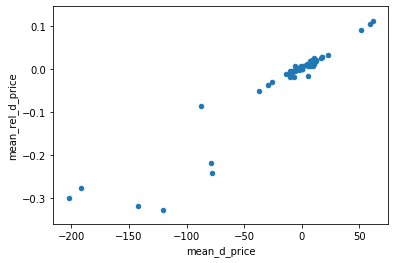

In [148]:
shop_stats.plot(kind='scatter', y='mean_rel_d_price', x='mean_d_price')

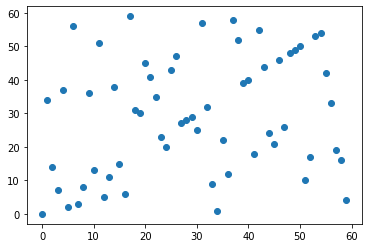

In [127]:
plt.scatter(shops_by_rel_price, shops_by_price)
plt.show()

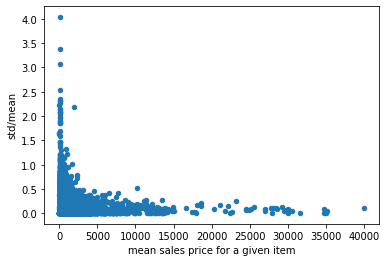

In [109]:
price.plot(kind='scatter', x='mean', y='std/mean')
plt.xlabel('mean sales price for a given item');

Text(0.5, 0, 'total number of sales')

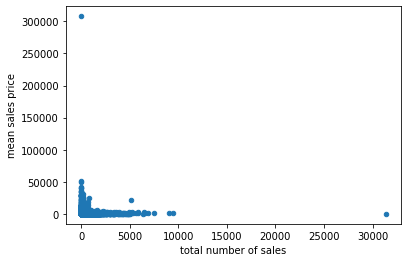

In [91]:
price.plot(kind='scatter', x='count', y='mean')
plt.ylabel('mean sales price')
plt.xlabel('total number of sales')

In [93]:
price[price['mean'] > 100000]

,count,mean,std/mean
item_id,,,
6066,1,307980.0,NaN


In [94]:
price[price['count'] > 15000]

,count,mean,std/mean
item_id,,,
20949,31340,4.914856,0.080987


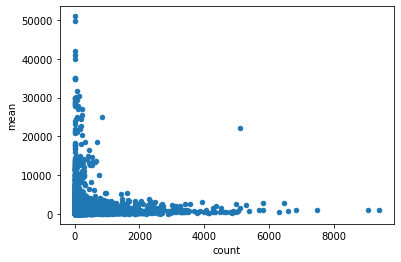

In [100]:
price[(price['mean'] < 100000) & (price['count'] < 15000)].plot(kind='scatter', x='count', y='mean')

Text(0.5, 0, 'total number of the item sold')

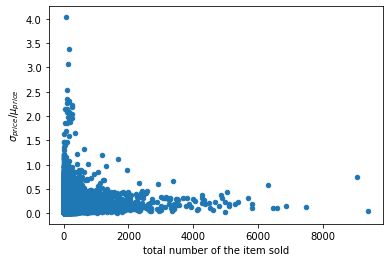

In [108]:
price[(price['mean'] < 100000) & (price['count'] < 15000)].plot(kind='scatter', x='count', y='std/mean')
plt.ylabel('$\sigma_{price}/\mu_{price}$')
plt.xlabel('total number of the item sold')

Text(0.5, 1.0, 'Does the relative variation in price depend on the mean price?')

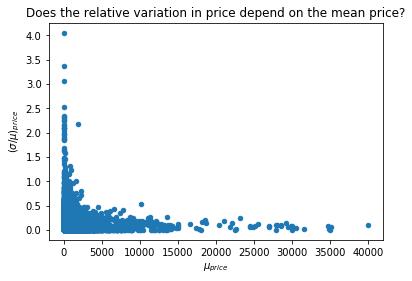

In [107]:
price[(price['mean'] < 100000) & (price['count'] < 15000)].plot(kind='scatter', x='mean', y='std/mean')
plt.ylabel('$(\sigma/\mu)_{price}$')
plt.xlabel('$\mu_{price}$')
plt.title('Does the relative variation in price depend on the mean price?')

In [70]:
sales['item_price'].value_counts()

299.000000     291352
399.000000     242603
149.000000     218432
199.000000     184044
349.000000     101461
                ...  
1170.600000         1
237.600000          1
1170.162500         1
4613.545455         1
4.571429            1
Name: item_price, Length: 19993, dtype: int64

Does the sales price for a given item in a given store change with time?  (is there variance in the time series?)

How long after a price reduction is there an increase in sales?

What if there is a price reduction in just one store vs many/all stores?

We don't have price data for the test set, but we do have price reductions leading right up to it as well as price reductions in the previous november.  Might be good to try to predict price before predicting sales.

Going to be hard to separate effects of price from seasonality, given only one season of data.

Are some stores consistently cheaper than others, or is it oscillatory?

Create a feature store_in_test?

Can we predict price changes from seasonality?  Make a plot of avg change in price for a given item over time.  Aggregate over stores.

In [42]:
# are there fluctuations in price for a given item in a given store?
grouped = sales.groupby(['shop_id', 'item_id'])['item_price'].std()/sales.groupby(['shop_id', 'item_id'])['item_price'].mean()
grouped.unstack()

item_id,0,1,2,3,4,5,6,7,8,9,...,22160,22161,22162,22163,22164,22165,22166,22167,22168,22169
shop_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,0.106902,NaN,NaN,0.000000,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.069853,NaN,0.053989,NaN,NaN,0.000000,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.049819,0.00000,0.092196,NaN,NaN,0.000000,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.256042,NaN,0.056841,NaN,0.079728,NaN,NaN,0.000000,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.064683,NaN,0.143062,NaN,NaN,0.000000,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#mean price of a given item across stores, time
sales.groupby(['shop_id', 'item_id'])['item_price'].mean().unstack().mean()



item_id
0          58.000000
1        4490.000000
2          58.000000
3          79.000000
4          58.000000
            ...     
22165      59.000000
22166     150.000000
22167     290.141977
22168     798.900000
22169    4349.000000
Length: 21807, dtype: float64

In [55]:
t_avg_price = sales.groupby(['shop_id', 'item_id'])['item_price'].mean().unstack()
dcost = (t_avg_price - t_avg_price.mean())/t_avg_price.mean()
dcost = dcost.T

In [57]:
dcost

shop_id,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
item_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
22166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
22167,NaN,NaN,0.030530,0.03053,0.03053,0.03053,0.03053,0.03053,NaN,NaN,...,0.03053,-0.465779,0.027083,0.03053,0.03053,NaN,0.03053,0.03053,0.03053,0.03053


In [56]:
dcost.mean() #this is the overall average

shop_id
0    -0.232554
1    -0.247302
2    -0.011384
3     0.010771
4     0.012185
5     0.000012
6     0.019894
7     0.021670
8     0.111172
9     0.013515
10   -0.299230
11   -0.299137
12   -0.021057
13   -0.317558
14   -0.000044
15    0.032286
16    0.031097
17    0.009089
18    0.024298
19    0.026208
20    0.009240
21    0.008275
22    0.005627
23    0.118571
24    0.033937
25    0.019013
26    0.035259
27    0.028298
28    0.039007
29    0.048990
30    0.028088
31    0.014048
32    0.102181
33   -0.017039
34   -0.094387
35    0.014647
36   -0.006572
37    0.027400
38    0.007470
39   -0.071964
40    0.022448
41    0.020538
42    0.017893
43    0.045206
44    0.038391
45    0.015212
46    0.034788
47    0.030976
48   -0.046553
49   -0.038762
50    0.044077
51   -0.310796
52    0.000854
53    0.002627
54    0.029349
55   -0.000101
56    0.004385
57    0.016616
58    0.018892
59    0.010423
dtype: float64

In [44]:
sales.head()
grouped = sales.groupby(['item_id'])['item_price'].std()/sales.groupby(['item_id'])['item_price'].mean()
grouped

item_id
0             NaN
1        0.000000
2        0.000000
3        0.375930
4             NaN
           ...   
22165    0.000000
22166    0.000000
22167    0.042586
22168    0.000256
22169         NaN
Name: item_price, Length: 21807, dtype: float64

In [4]:
test = pd.read_csv('test.csv')
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [32]:
df = test.drop(columns=['ID'])#.pivot_table(index='shop_id', columns='item_id', aggfunc='count')
df['total'] = 1
pivoted = df.pivot_table(index='shop_id', columns='item_id', aggfunc='count')
n_test_stores = pivoted.shape[0]
n_test_items = pivoted.shape[1]
print("number of test set stores= ", n_test_stores)
print("number of test set items = ", n_test_items)

number of test set stores=  42
number of test set items =  5100


In [33]:
pivoted[pivoted != 1].sum().sum()

0.0

So all of the stores in the test set have all of the test set items.

In [36]:
n_train_stores = len(sales['shop_id'].unique())
n_train_items = len(sales['item_id'].unique())


print("number of train set stores= ", n_train_stores)
print("number of train set items = ", n_train_items)

number of train set stores=  60
number of train set items =  21807


Only 1/4 of the items and 2/3 of stores are in test set

Does the price of a given item vary by store or by time?

Do all stores exist for the entire period of the train set?  (Maybe some stores close or open?)

Is there a way to tell which stores have run out of some product?  Or gotten more product in?



In [5]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


In [4]:
sales['revenue'] = sales['item_cnt_day']*sales['item_price']
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
0,02.01.2013,0,59,22154,999.00,1.0,999.00
1,03.01.2013,0,25,2552,899.00,1.0,899.00
2,05.01.2013,0,25,2552,899.00,-1.0,-899.00
3,06.01.2013,0,25,2554,1709.05,1.0,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,1099.00
...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,299.00
2935845,09.10.2015,33,25,7460,299.00,1.0,299.00
2935846,14.10.2015,33,25,7459,349.00,1.0,349.00
2935847,22.10.2015,33,25,7440,299.00,1.0,299.00


In [17]:
dates = pd.to_datetime(sales['date'].str.split('.', expand=True).rename(columns={0:'day', 1:'month',  2:'year'}))

In [18]:
sales['date'] = dates
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [20]:
#sales['pos_revenue'] = 
sales['revenue'] = sales['item_price']*sales['item_cnt_day']

In [21]:
sales.groupby(['shop_id','date'])['revenue'].sum()

shop_id  date      
0        2013-01-03    110588.0
         2013-01-04    231122.0
         2013-01-05    167500.0
         2013-01-06    140013.0
         2013-01-07     68469.0
                         ...   
59       2015-10-27     32313.0
         2015-10-28     40210.0
         2015-10-29     17027.0
         2015-10-30     21957.0
         2015-10-31     45018.0
Name: revenue, Length: 47228, dtype: float64

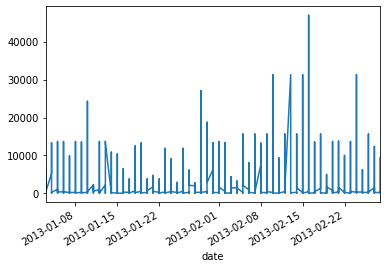

In [27]:
sales[sales['shop_id'] == 0].set_index('date')['revenue'].plot()

In [40]:
sales[sales['shop_id'] == 0].set_index('date')['revenue'].sort_index()

date
2013-01-03     205.0
2013-01-03     578.0
2013-01-03    1556.0
2013-01-03     247.0
2013-01-03    1925.0
               ...  
2013-02-28     378.0
2013-02-28    1313.0
2013-02-28      27.0
2013-02-28    3178.0
2013-02-28     247.0
Name: revenue, Length: 9857, dtype: float64

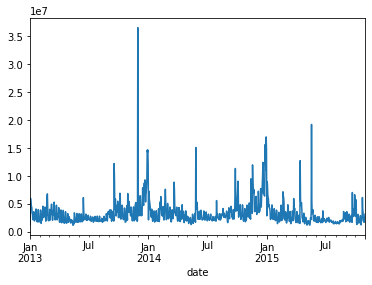

In [31]:
sales.groupby(['date'])['revenue'].sum().plot()

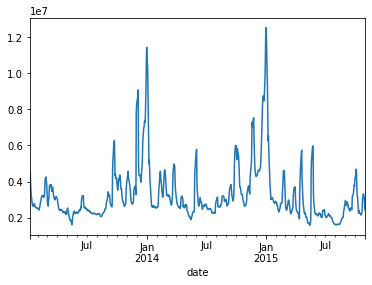

In [43]:
sales.groupby(['date'])['revenue'].sum().sort_index().rolling(7).mean()[7:].plot()

In [ ]:
sales.groupby(['date'])['revenue'].sum().rolling

In [ ]:
#idea for feature: look for new items...sales is zero until some date

#idea for feature: look for weekly periodicity

#idea for feature: look for monthly periodicity

In [32]:
sales.groupby(['date','item_id'])['revenue'].sum()

date        item_id
2013-01-01  32         2442.44
            33          998.00
            53          170.00
            59          359.00
            85          299.00
                        ...   
2015-10-31  22102      7500.00
            22118        98.00
            22139       399.00
            22145       199.00
            22167       598.00
Name: revenue, Length: 1541614, dtype: float64

In [35]:
sales_by_item = sales.groupby(['date_block_num', 'item_id'])['revenue'].sum()

In [37]:
sales_by_item[sales_by_item == 0]

date_block_num  item_id
0               1628       0.0
                2199       0.0
                2552       0.0
                6923       0.0
                12283      0.0
                          ... 
8               21754      0.0
9               2811       0.0
                6478       0.0
                8773       0.0
                19292      0.0
Name: revenue, Length: 182, dtype: float64